In [1]:
import splitwavepy as sw
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# SplitWavePy

Tools to measure shear wave splitting.

Written in Python.



# Shear Wave Splitting

When a shear wave travels through an anisotropic material it splits its energy into two orthogonally polarised quasi-shear waves.

These waves travel at different speeds causing them to split.  

This process is parameterised in terms of the polarisation of the fast wave ($\phi$) and the delay time between the fast and slow wave arrivals ($\delta t$).

# Simple Example

## Forward Problem

To replicate the effect of splitting synthetically:




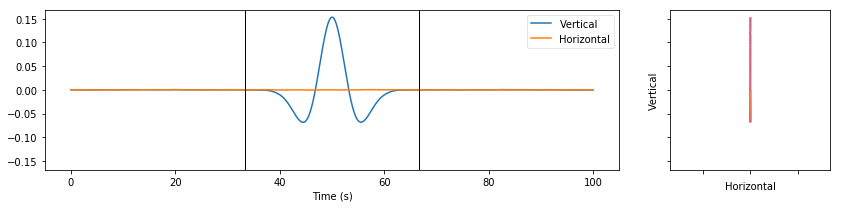

In [2]:
# Generate a starting wavelet
a = sw.Pair(delta=0.1, geom='ray')
a.plot()

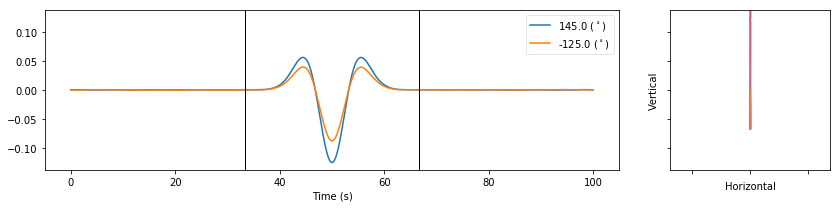

In [3]:
# Rotate to fast/slow directions
a.rotateto(145)
a.plot()

In [5]:
# Apply lag
a.lag(3.0)
a.plot()

AttributeError: 'Pair' object has no attribute 'lag'

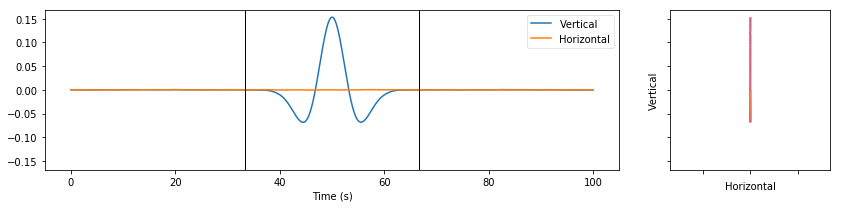

In [6]:
# Rotate back to polarisation
a.rotateto(0)
a.plot()

# Measuring Splitting

The basic approach is to grid search for the *inverse* splitting parameters that remove the splitting.

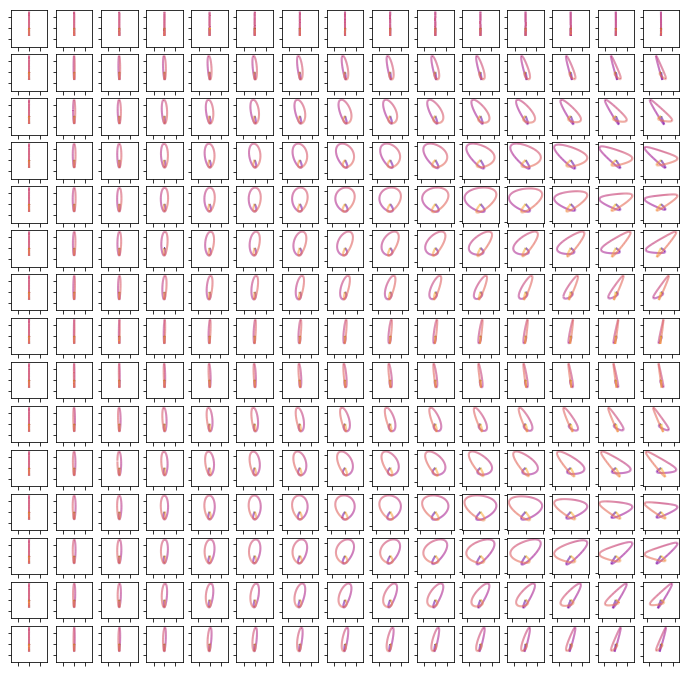

In [7]:
def grid_pm(pair):
    
    lags = np.linspace(0,5,15, endpoint=False)
    degs = np.linspace(90,-90,15, endpoint=False)
    
    
#     fig, axw = plt.subplots()
#     axw.set_xlim([0,5])
#     axw.set_ylim([-90,90])

    
    fig = plt.figure(figsize=(12, 12))     

#     plt.subplot(111)
    
    gs = gridspec.GridSpec(15, 15) 
    ii = -1
    
    for ang in degs:
        for lag in lags:
            ii = ii + 1
            ax = plt.subplot(gs[ii])
            # ensure trace1 at zero angle
            copy = pair.copy()
            copy.unsplit(ang, lag)
            copy._ppm(ax, cmplabels=['',''])
    
    plt.show()

grid_pm(a)

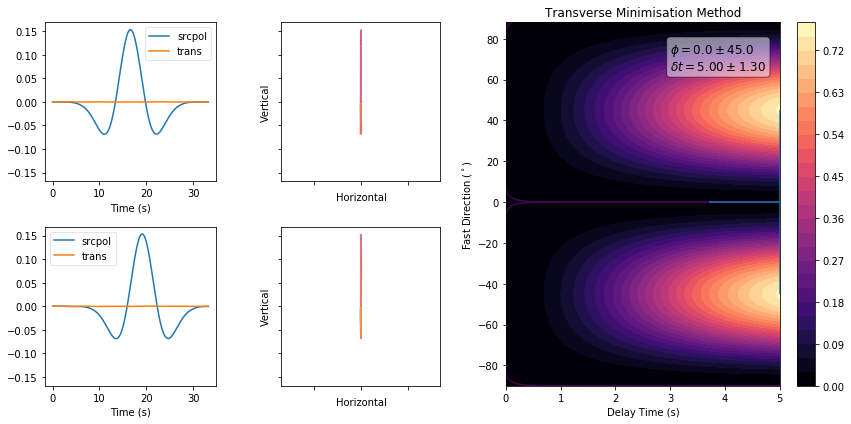

In [8]:
ta = sw.TransM(a, lags=(5,), pol=0)
ta.plot(vals = ta.lam2, title='Transverse Minimisation Method')

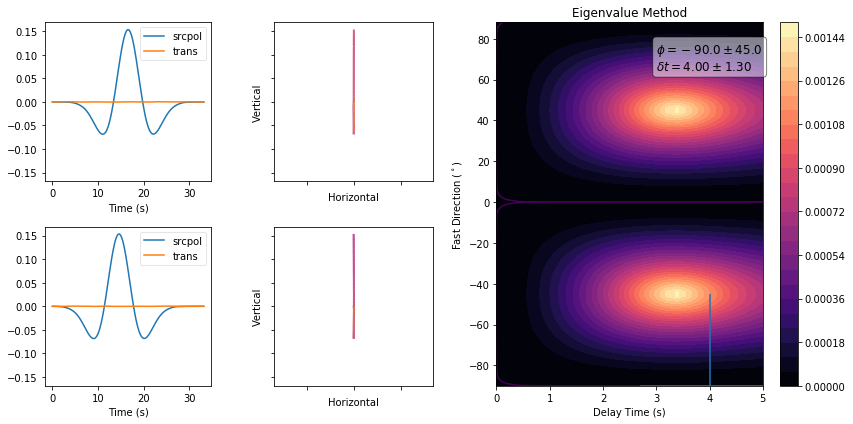

In [9]:
ea = sw.EigenM(a, lags=(5,))
ea.plot(vals=ea.lam2,title='Eigenvalue Method')

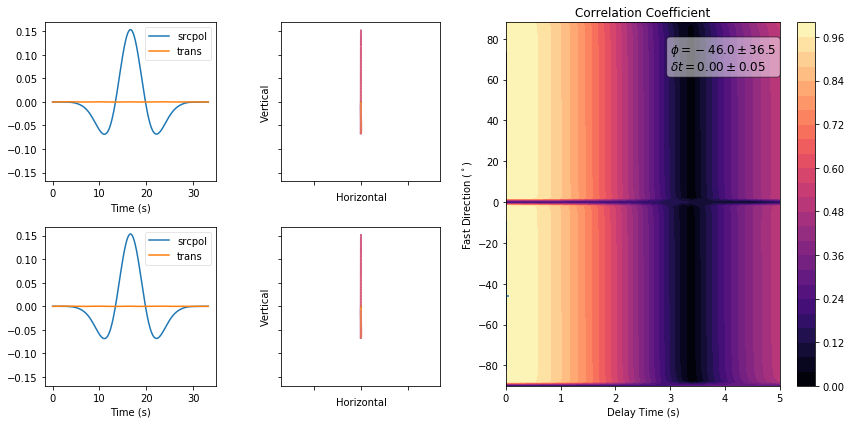

In [10]:
ca = sw.CrossM(a, lags=(5,))
ca.plot()

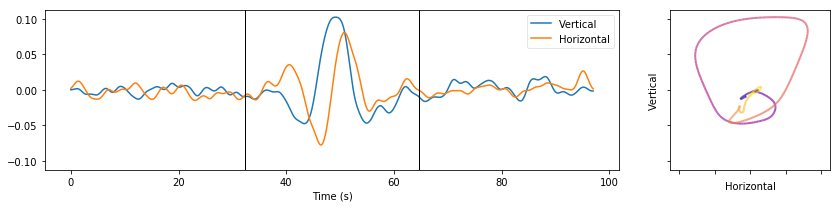

In [11]:
# Generate a starting wavelet
b = sw.Pair(delta=0.1, geom='ray', noise=0.04, split=(126,3.0), pol=0)
b.plot()

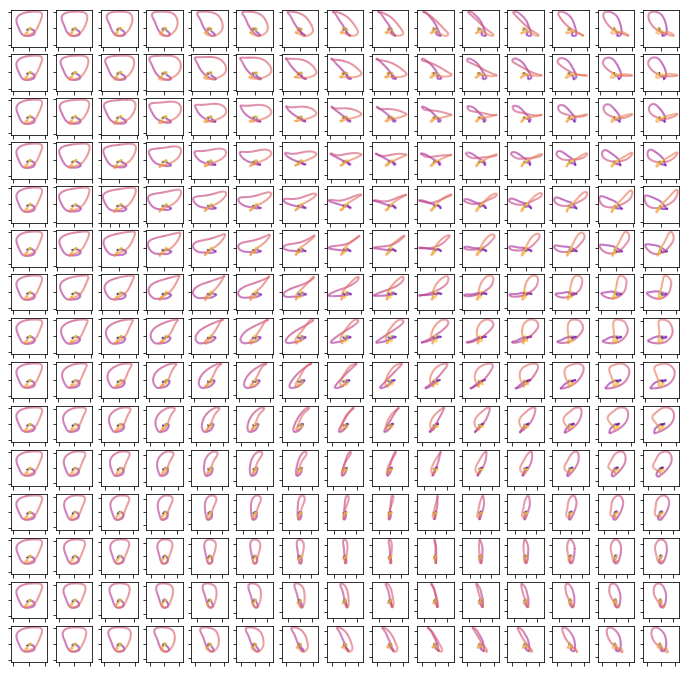

In [12]:
grid_pm(b)

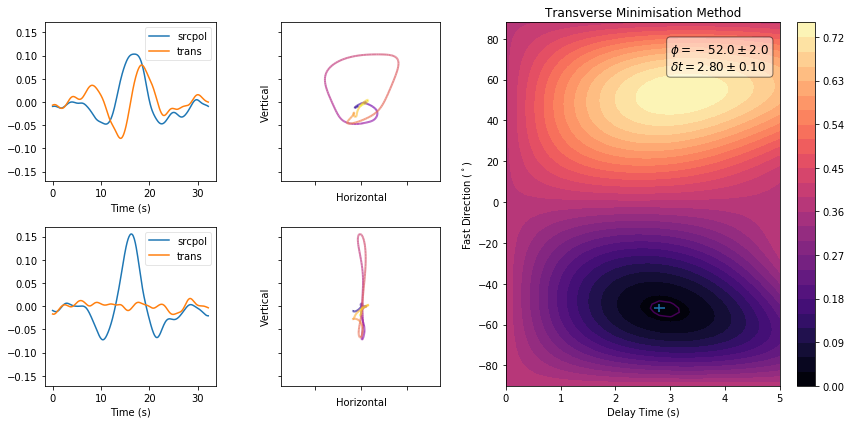

In [13]:
tb = sw.TransM(b, lags=(5,), pol=0)
tb.plot(vals = tb.lam2, title='Transverse Minimisation Method')

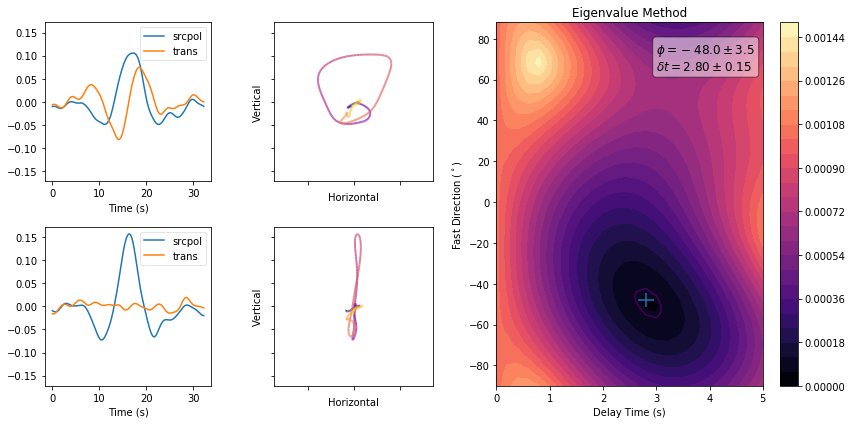

In [14]:
eb = sw.EigenM(b, lags=(5,))
eb.plot(vals = eb.lam2, title='Eigenvalue Method')

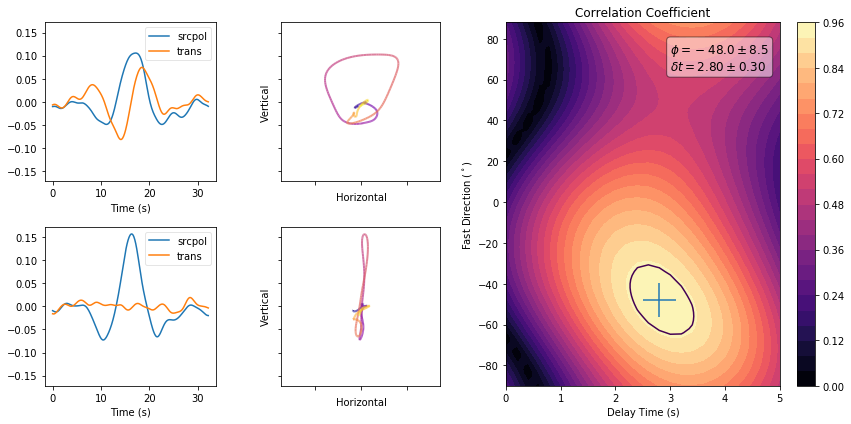

In [15]:
cb = sw.CrossM(b, lags=(5,))
cb.plot(title='Cross Correlation Method')

# Methods

* Maximise cross-correlation coefficient of fast and slow wavelets
* Minimise energy on transverse component


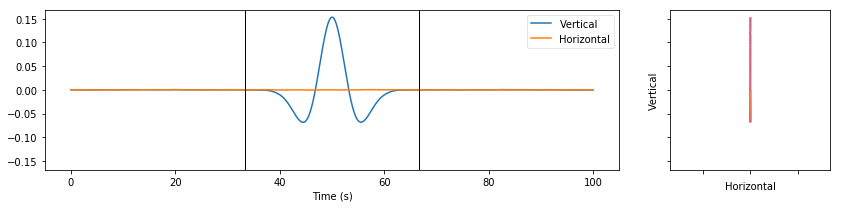

In [16]:
a.plot()

In [17]:
def grid_pm(pair):
    
    lags = np.linspace(0,5,15, endpoint=False)
    degs = np.linspace(-90,90,15, endpoint=False)
    
    fig = plt.figure(figsize=(12, 12))     
    
    ax = plt.gca()
    ax.set_xlim([0,5])
    ax.set_ylim([-90,90])
    
    gs = gridspec.GridSpec(15, 15) 
    
    ii = -1
    
    for ang in degs:
        for lag in lags:
            ii = ii + 1
            ax = plt.subplot(gs[ii])
            # ensure trace1 at zero angle
            copy = pair.copy()
            copy.unsplit(ang, lag)
            copy._ppm(ax, cmplabels=['',''])
    
    plt.show()
    


In [18]:
lags

NameError: name 'lags' is not defined

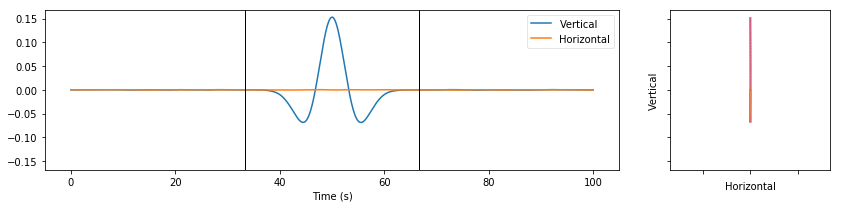

In [62]:
a.plot()

In [65]:
b = a.copy()
x = b.x
y = b.y
t = b.t()

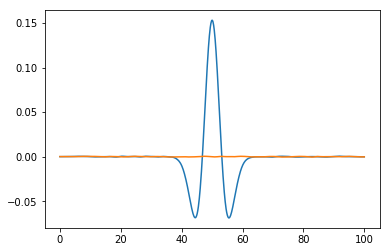

In [68]:
plt.plot(t,x,t,y)
plt.show()

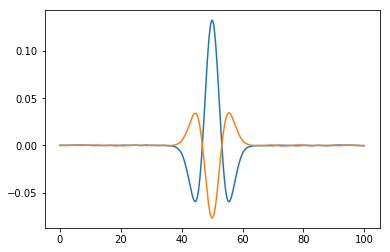

In [69]:
x2,y2 = sw.core.rotate(x, y, 30)
plt.plot(t,x2,t,y2)
plt.show()

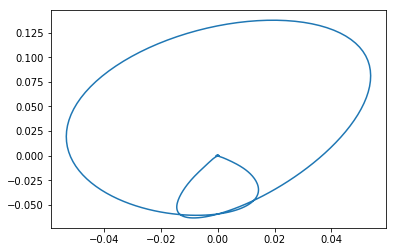

In [74]:
x3, y3 = sw.core.unsplit(x, y, 30, 20)
plt.plot(y3,x3)
plt.show()

In [72]:
y.size

1001

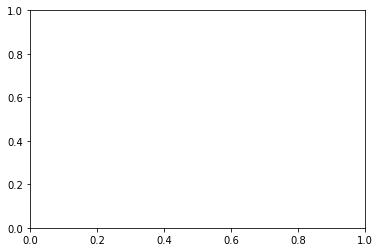

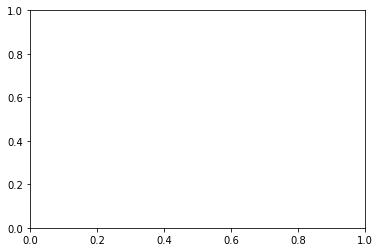

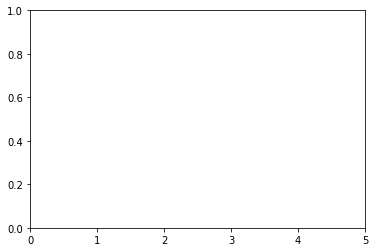

In [105]:
fig, ax = plt.subplots()
ax.set_xlim([0,5])
plt.show()